In [32]:
import json
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [2]:
with open('author_data.json') as f:
    coauthor_data = json.load(f)

In [3]:
df = pd.DataFrame.from_dict(coauthor_data, orient='index')

In [4]:
# Normalize the data
df['name'] = df.apply(lambda row: f"{row['first name']} {row['last name']}", axis=1)
df['topics'] = df['publication topics'].apply(lambda topics: [topic['name'] for topic in topics])
df['coAuthors'] = df['coAuthors'].apply(lambda coauthors: [coauthor['id'] for coauthor in coauthors])

In [5]:
df.head()

,preferred name,first name,last name,aliases,affiliations,article count,publication topics,coAuthors,author publications,name,topics
99659859971,none,Junyi,Shu,none,[Peking University],2,"[{'id': 'none', 'name': 'External storage', 'n...","[99659853258, 84459152157, 84758643357, 813506...",none,Junyi Shu,"[External storage, Storage management]"
99659853258,none,Xin,Jin,none,[Peking University],18,"[{'id': 'none', 'name': 'Cloud computing', 'nu...","[84459109657, 81467644390, 81350600064, 815480...",none,Xin Jin,"[Cloud computing, Cloud computing, Distributed..."
84758643357,none,Yun,Ma,none,"[Peking University, Tsinghua University, Key L...",34,"[{'id': 'none', 'name': 'Software testing and ...","[81350600064, 84459152157, 99659859971, 996598...",none,Yun Ma,"[Software testing and debugging, Empirical stu..."
84459152157,none,Xuanzhe,Liu,none,"[Peking University, Key Lab of High Confidence...",93,"[{'id': 'none', 'name': 'Web applications', 'n...","[84459109657, 99659853258, 81350600064, 815480...",none,Xuanzhe Liu,"[Web applications, Cloud computing, Ubiquitous..."
81350600064,none,Gang,Huang,none,"[Peking University, Key Lab of High Confidence...",124,"[{'id': 'none', 'name': 'Software architecture...","[84459109657, 99659853258, 84459152157, 996598...",none,Gang Huang,"[Software architectures, Web applications, Dis..."


1. Histogram for the publication topics

In [6]:
# Flatten the list of topics from the dataframe
topics = df['topics'].explode().tolist()

unique_topics_count = df['topics'].explode().nunique()

print(f"Number of unique topics: {unique_topics_count}")

# Count the occurrences of each topic
topic_counts = Counter(topics)

# Get the top twenty most occurred topics
top_topics = topic_counts.most_common(20)
topics, counts = zip(*top_topics)

# Display the top twenty topics and their counts
for topic, count in top_topics:
    print(f"Topic: {topic}, Count: {count}")

Number of unique topics: 1164
Topic: Network protocols, Count: 935
Topic: Network architectures, Count: 691
Topic: Performance, Count: 626
Topic: Mobile networks, Count: 618
Topic: Network management, Count: 557
Topic: Distributed systems organizing principles, Count: 536
Topic: Networks, Count: 456
Topic: Wireless access networks, Count: 444
Topic: Communication hardware, interfaces and storage, Count: 427
Topic: Network monitoring, Count: 413
Topic: Routing protocols, Count: 381
Topic: Distributed architectures, Count: 368
Topic: Dependable and fault-tolerant systems and networks, Count: 354
Topic: Network services, Count: 341
Topic: Network measurement, Count: 247
Topic: Transport protocols, Count: 234
Topic: Security and privacy, Count: 216
Topic: Public Internet, Count: 202
Topic: Cloud computing, Count: 200
Topic: Machine learning, Count: 197


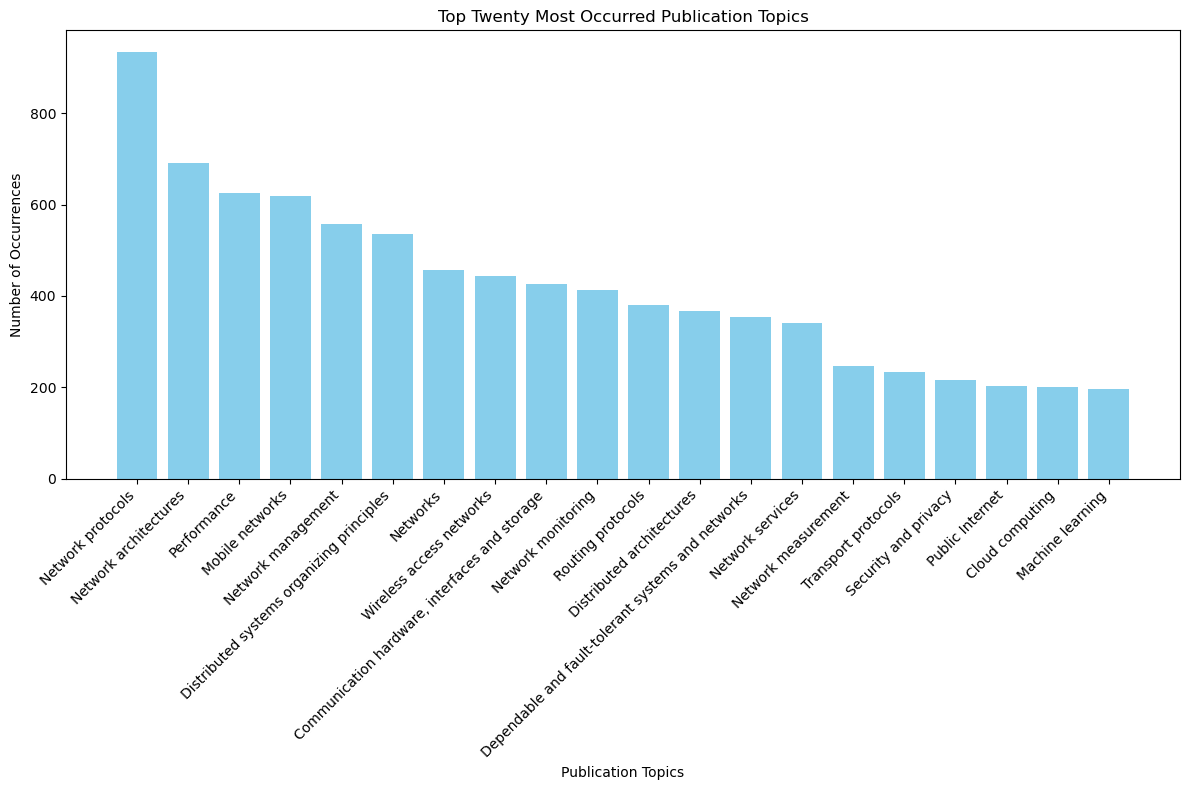

In [7]:
# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(topics, counts, color='skyblue')
plt.xlabel('Publication Topics')
plt.ylabel('Number of Occurrences')
plt.title('Top Twenty Most Occurred Publication Topics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

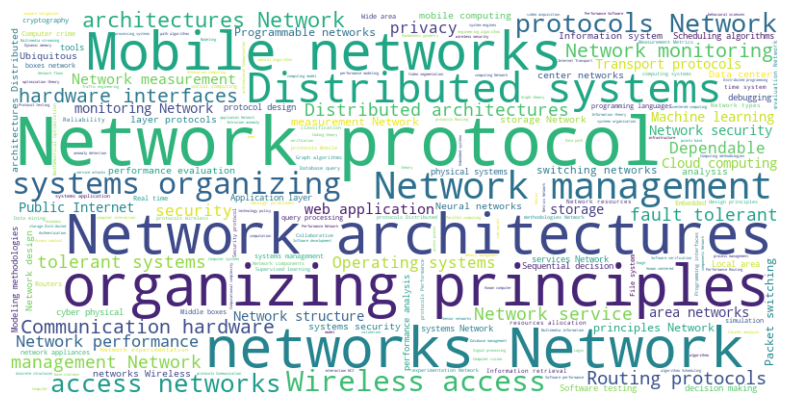

In [33]:
all_topics = df['topics'].explode().dropna().tolist()

# Combine all topics into a single string for the word cloud
combined_topics = ' '.join(all_topics)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_topics)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

2. Histogram for the affiliations

In [8]:
# Flatten the list of affiliations from the dataframe
affiliations = df['affiliations'].explode().dropna().tolist()

# Count the occurrences of each affiliation
affiliation_counts = Counter(affiliations)

# Get the top twenty most occurred affiliations
top_affiliations = affiliation_counts.most_common(20)
affiliations, counts = zip(*top_affiliations)

# Display the top twenty affiliations and their counts
for affiliation, count in top_affiliations:
    print(f"Affiliation: {affiliation}, Count: {count}")

Affiliation: University of California, Berkeley, Count: 115
Affiliation: Microsoft Corporation, Count: 105
Affiliation: Stanford University, Count: 95
Affiliation: Google LLC, Count: 95
Affiliation: Microsoft Research, Count: 95
Affiliation: Tsinghua University, Count: 91
Affiliation: Carnegie Mellon University, Count: 87
Affiliation: Massachusetts Institute of Technology, Count: 82
Affiliation: Nokia Bell Labs, Count: 72
Affiliation: MIT Computer Science & Artificial Intelligence Laboratory, Count: 65
Affiliation: IEEE, Count: 64
Affiliation: University of Washington, Count: 59
Affiliation: Princeton University, Count: 55
Affiliation: University of Southern California, Count: 53
Affiliation: National University of Defense Technology China, Count: 50
Affiliation: University of California, San Diego, Count: 49
Affiliation: University of Massachusetts Amherst, Count: 46
Affiliation: Georgia Institute of Technology, Count: 43
Affiliation: University of Michigan, Ann Arbor, Count: 43
Affil

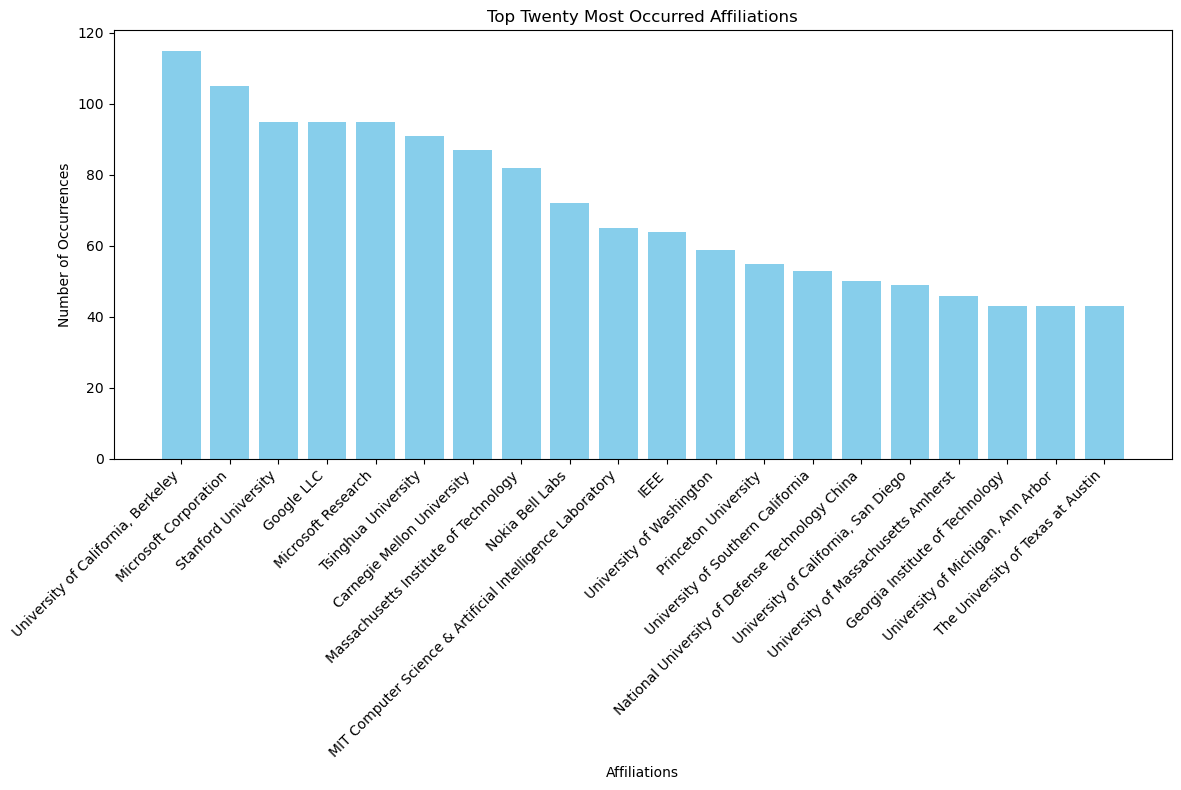

In [9]:
# Plot the histogram
plt.figure(figsize=(12, 8))
plt.bar(affiliations, counts, color='skyblue')
plt.xlabel('Affiliations')
plt.ylabel('Number of Occurrences')
plt.title('Top Twenty Most Occurred Affiliations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Bar graph to illustrate author productivity

In [10]:
df = df.dropna(subset=['article count'])

# Sort authors by the number of publications and get the top 20
top_authors = df[['name', 'article count']].sort_values(by='article count', ascending=False).head(20)

# Extract the names and article counts
author_names = top_authors['name'].tolist()
article_counts = top_authors['article count'].tolist()

# Display the top productive authors
for name, count in zip(author_names, article_counts):
    print(f"Author: {name}, Article Count: {count}")

Author: Christos Faloutsos, Article Count: 497
Author: Kang Shin, Article Count: 456
Author: Tat-Seng Chua, Article Count: 442
Author: Don Fred Towsley, Article Count: 426
Author: Mario Gerla, Article Count: 398
Author: Xuelong Li, Article Count: 393
Author: Enhong Chen, Article Count: 381
Author: M. I. Jordan, Article Count: 380
Author: Athanasios V Vasilakos, Article Count: 380
Author: Edward A. Fox, Article Count: 343
Author: Christos Harilaos Papadimitriou, Article Count: 342
Author: Yunhao Liu, Article Count: 320
Author: Eitan Altman, Article Count: 299
Author: Scott J. Shenker, Article Count: 298
Author: Douglas Clark Schmidt, Article Count: 295
Author: Mingsyan Chen, Article Count: 291
Author: Randy Katz, Article Count: 287
Author: Yishay Mansour, Article Count: 285
Author: Roger P Wattenhofer, Article Count: 283
Author: I. Stoica, Article Count: 283


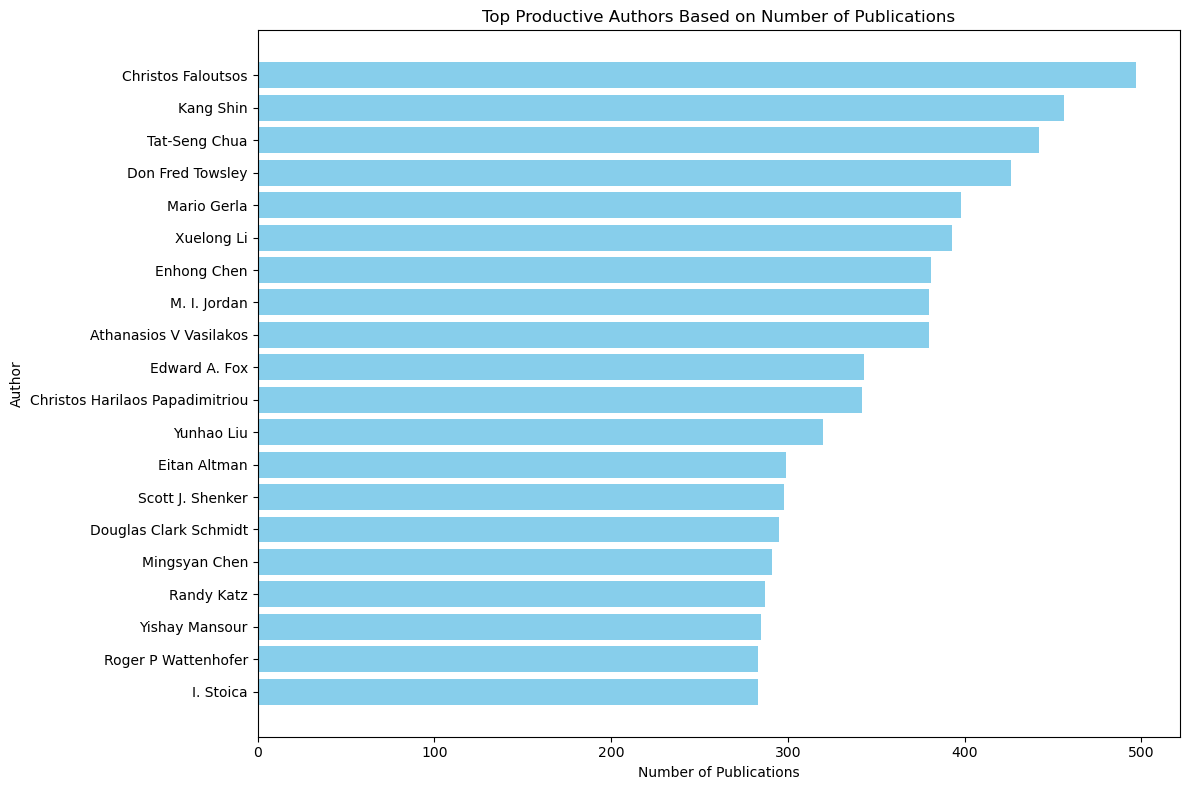

In [11]:
plt.figure(figsize=(12, 8))
plt.barh(author_names, article_counts, color='skyblue')
plt.xlabel('Number of Publications')
plt.ylabel('Author')
plt.title('Top Productive Authors Based on Number of Publications')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
# Create a graph
G = nx.Graph()

# Add nodes and edges
for index, row in df.iterrows():
    G.add_node(row['name'])  # Add each author as a node
    for coauthor in row['coAuthors']:
        # Find the coauthor's name in the dataframe
        coauthor_name = df[df.index == coauthor]['name'].values[0] if coauthor in df.index else None
        if coauthor_name and not G.has_edge(row['name'], coauthor_name):
            G.add_edge(row['name'], coauthor_name)

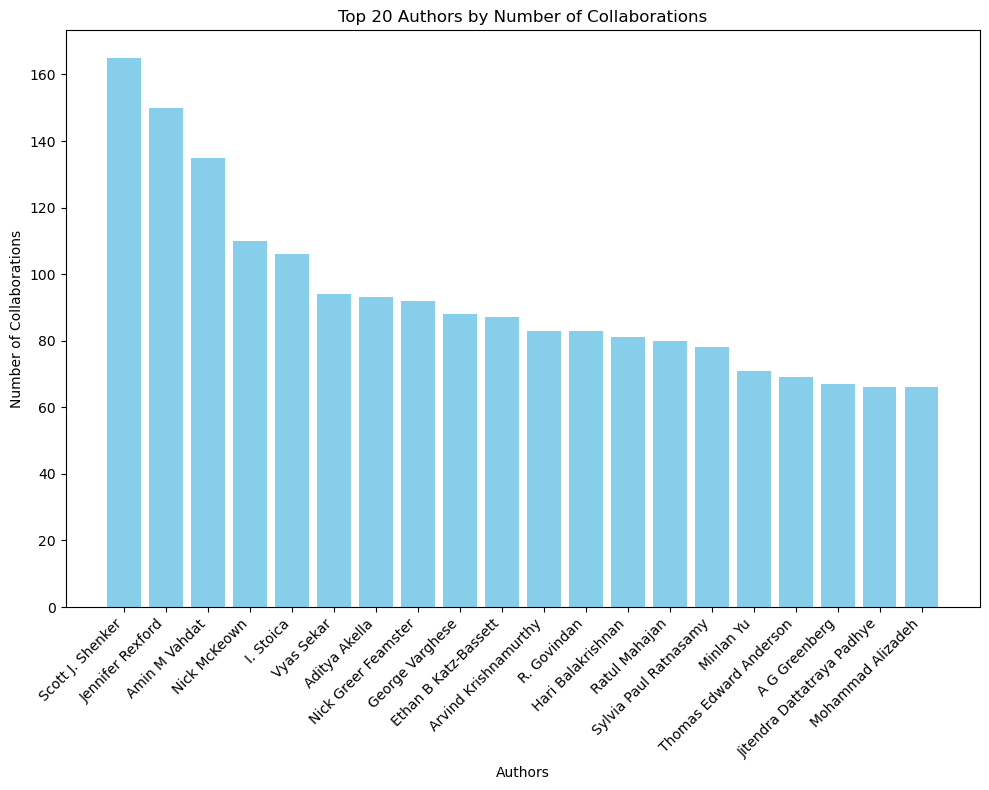

In [20]:
degrees = dict(G.degree())
top_authors = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:20]

author_names, collaborations = zip(*top_authors)

# Plotting
plt.figure(figsize=(10, 8))
plt.bar(author_names, collaborations, color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of Collaborations')
plt.title('Top 20 Authors by Number of Collaborations')
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate names for better visibility
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

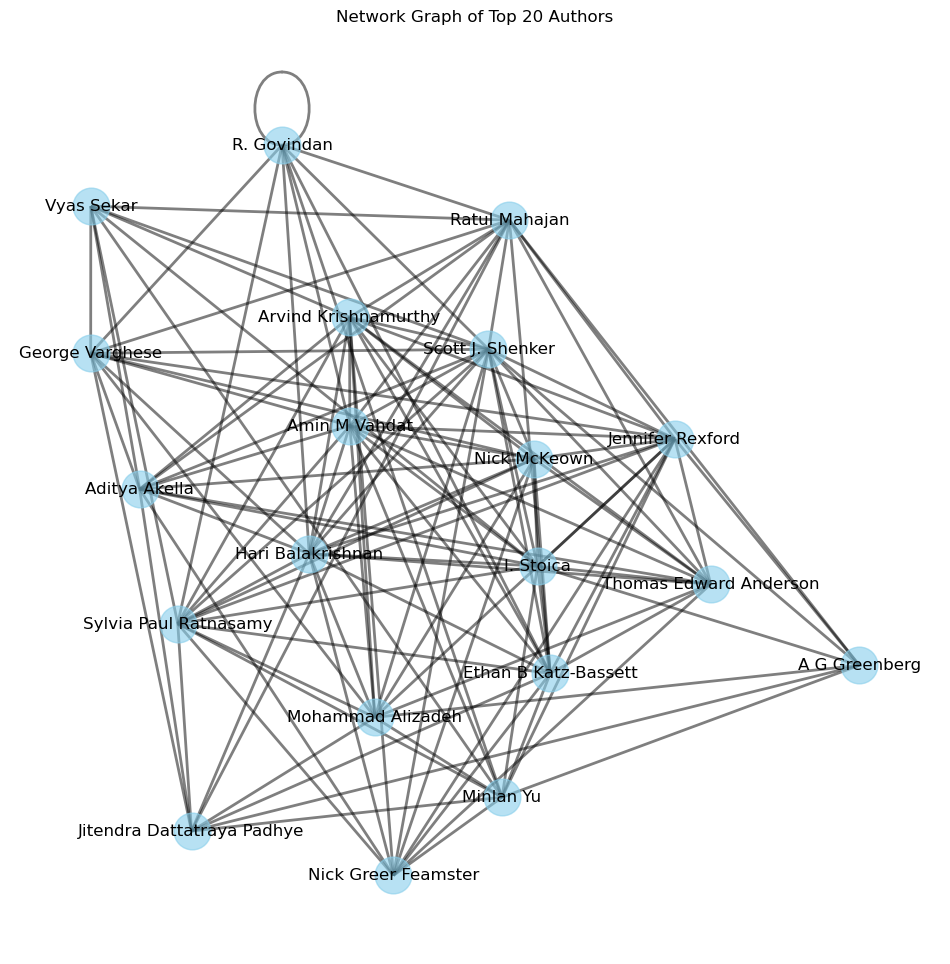

In [16]:
# Create a subgraph for these authors
subgraph = G.subgraph(top_authors)

# Visualization using NetworkX and Matplotlib
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph)  # positions for all nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=700, node_color='skyblue', alpha=0.6)
nx.draw_networkx_edges(subgraph, pos, width=2, alpha=0.5)
nx.draw_networkx_labels(subgraph, pos, font_size=12, font_family='sans-serif')

plt.title('Network Graph of Top 20 Authors')
plt.axis('off')  # Turn off the axis
plt.show()

Degree Distribution: [165, 150, 135, 110, 106, 94, 93, 92, 88, 87, 83, 83, 81, 80, 78, 71, 69, 67, 66, 66, 66, 66, 63, 62, 61, 60, 59, 59, 59, 58, 58, 55, 54, 54, 53, 53, 52, 51, 51, 50, 49, 49, 48, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 44, 43, 43, 43, 42, 42, 42, 42, 42, 41, 41, 41, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 38, 38, 38, 37, 37, 37, 37, 36, 36, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 2

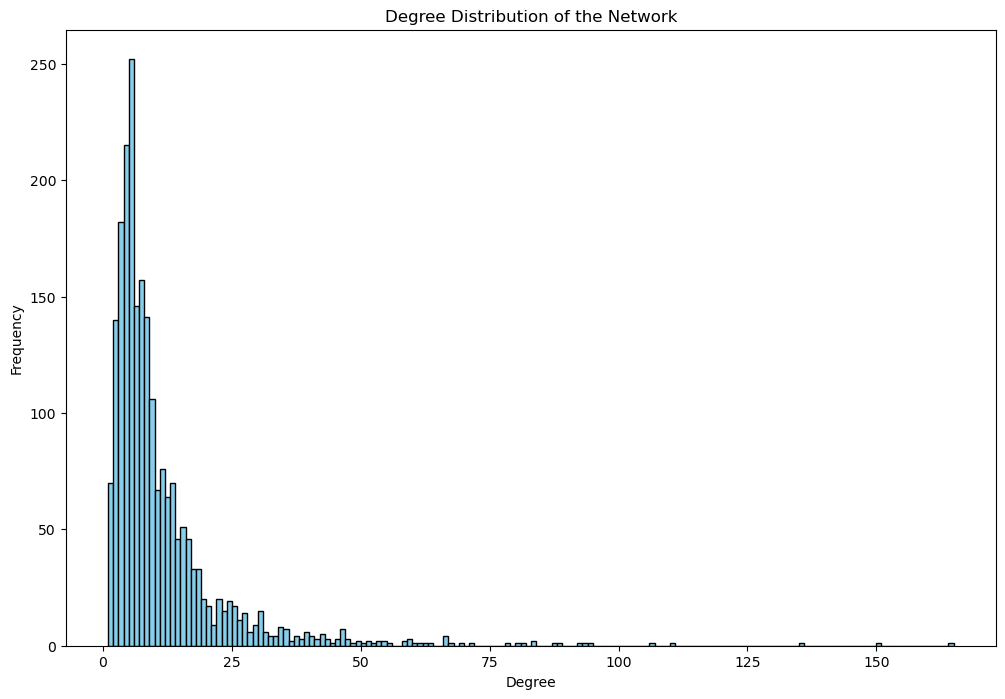

In [17]:
# Calculate degree distribution (the number of edges each node has)
degree_distribution = sorted([d for n, d in G.degree()], reverse=True)
print(f"Degree Distribution: {degree_distribution}")

plt.figure(figsize=(12, 8))
plt.hist(degree_distribution, bins=range(1, max(degree_distribution) + 1), color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the Network')
plt.show()

In [25]:
components = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(f"Total number of components: {len(components)}")
print(f"Component sizes: {components}")

Total number of components: 38
Component sizes: [2115, 6, 6, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


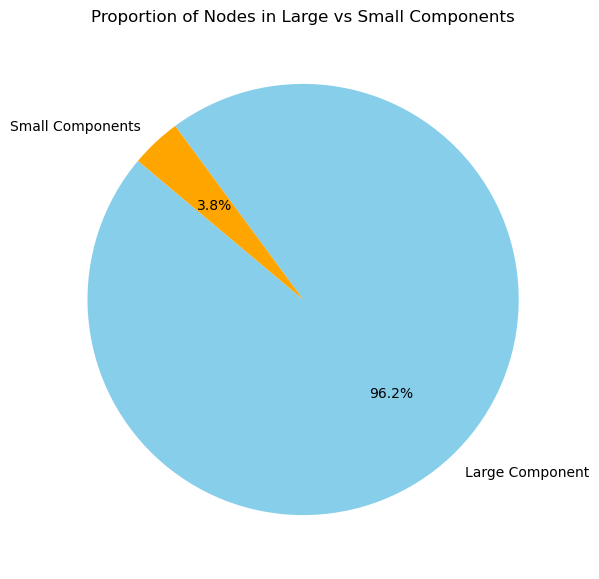

In [29]:
large_component = [size for size in components if size > 10]
small_components = [size for size in components if size <= 10]

sizes = [sum(large_component), sum(small_components)]
labels = ['Large Component', 'Small Components']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Proportion of Nodes in Large vs Small Components')
plt.show()

In [26]:
# Calculate clustering coefficient
# This suggests that if a researcher collaborates with two other researchers, there is a 61.07% chance that those two researchers also collaborate with each other.
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient:.4f}")

Clustering Coefficient: 0.6107


In [30]:
# Calculate centralities
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

In [31]:
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Display results
print("Top 5 Authors by Degree Centrality:")
for name, value in top_degree:
    print(f"{name}: {value:.4f}")

print("\nTop 5 Authors by Closeness Centrality:")
for name, value in top_closeness:
    print(f"{name}: {value:.4f}")

print("\nTop 5 Authors by Betweenness Centrality:")
for name, value in top_betweenness:
    print(f"{name}: {value:.4f}")

Top 5 Authors by Degree Centrality:
Scott J. Shenker: 0.0751
Jennifer Rexford: 0.0683
Amin M Vahdat: 0.0614
Nick McKeown: 0.0501
I. Stoica: 0.0482

Top 5 Authors by Closeness Centrality:
Jennifer Rexford: 0.3734
Scott J. Shenker: 0.3718
Aditya Akella: 0.3547
I. Stoica: 0.3542
Minlan Yu: 0.3511

Top 5 Authors by Betweenness Centrality:
Scott J. Shenker: 0.0633
Jennifer Rexford: 0.0569
Amin M Vahdat: 0.0401
Aditya Akella: 0.0322
George Varghese: 0.0307
